In [1]:
#Import data and drop all unusable rows
import pandas as pd
h=pd.read_excel('housing.xlsx')
H=h.dropna()
print(H.columns)
H.head()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
H.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 505
Data columns (total 14 columns):
CRIM       452 non-null float64
ZN         452 non-null float64
INDUS      452 non-null float64
CHAS       452 non-null float64
NOX        452 non-null float64
RM         452 non-null float64
AGE        452 non-null float64
DIS        452 non-null float64
RAD        452 non-null int64
TAX        452 non-null float64
PTRATIO    452 non-null float64
B          452 non-null float64
LSTAT      452 non-null float64
MEDV       452 non-null float64
dtypes: float64(13), int64(1)
memory usage: 53.0 KB


In [3]:
#Scatterplot of all variables
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(H,height=2.5)
plt.tight_layout()
plt.show()

<Figure size 3500x3500 with 210 Axes>

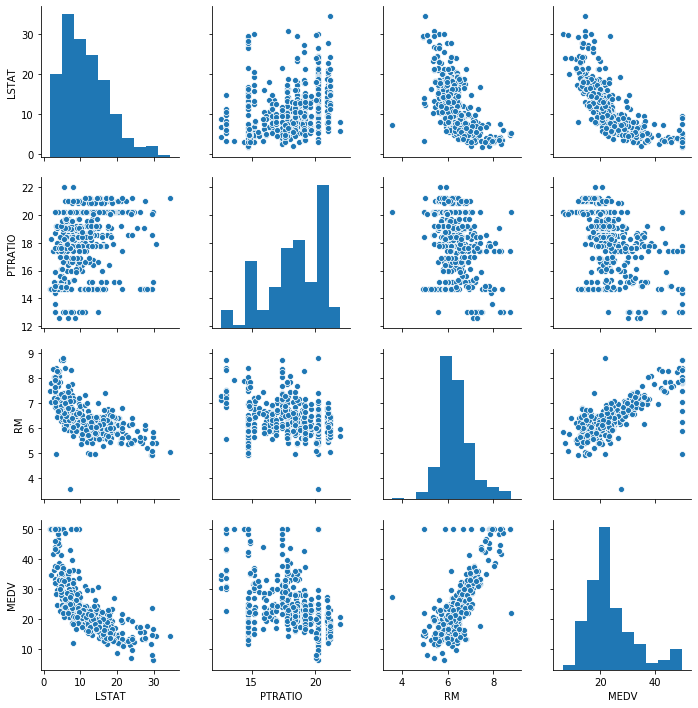

In [4]:
#Scatterplot of all variables that are highly correlated with MEDV
cols=H[['LSTAT','PTRATIO','RM','MEDV']]
sns.pairplot(cols)
plt.show()

In [5]:
#Correlation Coefficient Matrix
import numpy as np
corr_mat=np.corrcoef(H.values.T)
print(corr_mat)

[[ 1.         -0.28123893  0.5738223   0.0500659   0.63694107 -0.14245773
   0.44766376 -0.46196741  0.89798831  0.82566775  0.3194701  -0.41301437
   0.42478862 -0.28624499]
 [-0.28123893  1.         -0.51427332 -0.05969655 -0.50072854  0.30662341
  -0.55567886  0.65615208 -0.26660593 -0.26944592 -0.36412219  0.15037968
  -0.41116521  0.33156988]
 [ 0.5738223  -0.51427332  1.          0.10301631  0.7385173  -0.36489467
   0.60598159 -0.66936152  0.51330603  0.67331226  0.31733613 -0.31675222
   0.56540249 -0.41191453]
 [ 0.0500659  -0.05969655  0.10301631  1.          0.13406418  0.07657959
   0.12314067 -0.14066212  0.0573367   0.01689409 -0.09962273  0.0134152
  -0.00942993  0.15440873]
 [ 0.63694107 -0.50072854  0.7385173   0.13406418  1.         -0.26459441
   0.70714784 -0.7458124   0.54249915  0.61511982  0.10346419 -0.35843313
   0.53682418 -0.33277818]
 [-0.14245773  0.30662341 -0.36489467  0.07657959 -0.26459441  1.
  -0.18787087  0.13877413 -0.09593148 -0.21494783 -0.3341641

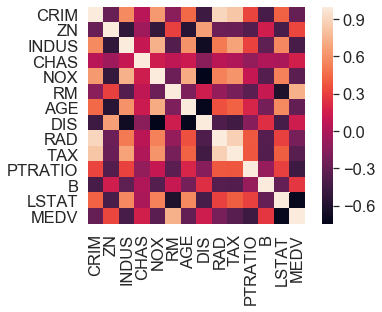

In [6]:
#heatmap
cm=np.corrcoef(H.values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=False,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=H.columns,xticklabels=H.columns)
plt.show()

In [7]:
#Split data 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=H.iloc[:,:-1].values
y=H['MEDV'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(H.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(452, 14) (361, 13) (91, 13) (361,) (91,)


In [8]:
#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg=LinearRegression()
reg.fit(X_train,y_train)
print("Coefficients:",reg.coef_)
print('Intercept: %.3f' % reg.intercept_)
y_pred=reg.predict(X_test)
print("R^2: {}".format(reg.score(X_test,y_test)))
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: {}".format(mse))

Coefficients: [-2.10978212e-01  3.03333448e-02  5.21741626e-02  1.78646977e+00
 -1.16261232e+01  5.31801604e+00 -2.06780275e-02 -1.33978603e+00
  2.48794157e-01 -9.31036789e-03 -8.78367327e-01  1.36707717e-02
 -4.79318745e-01]
Intercept: 20.400
R^2: 0.6976755382220081
Mean Squared Error: 20.97527480897777


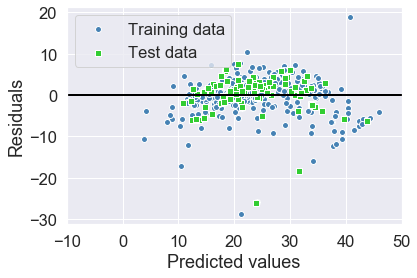

In [9]:
y_train_pred=reg.predict(X_train)
y_test_pred=reg.predict(X_test)
_=plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training data')
_=plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test data')
_=plt.xlabel('Predicted values')
_=plt.ylabel('Residuals')
_=plt.legend(loc='upper left')
_=plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
_=plt.xlim([-10,50])
plt.show()

Best Alpha:0.000868511373751352


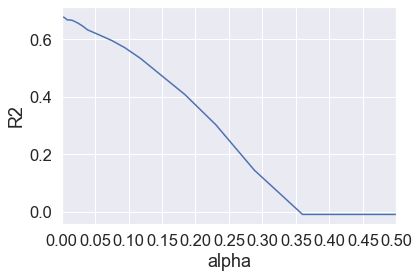

In [10]:
#LASSO
from sklearn.linear_model import Lasso
H1=pd.read_csv('housing2.csv')
H1=H1.dropna()
X=H1.iloc[:,:-1].values
y=H1['MEDV'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
alpha_space=np.logspace(-5,-0.25,50)
alpha_value=[]
R2_value=[]
for alpha in alpha_space:
    lasso=Lasso(alpha=alpha,normalize=True)
    lasso.fit(X_train,y_train)
    R2=lasso.score(X_test,y_test)
    alpha_value.append(alpha)
    R2_value.append(R2)
best=alpha_space[R2_value.index(max(R2_value))]
print("Best Alpha:{}".format(best))
plt.plot(alpha_value,R2_value)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.xlim(0,0.5)
plt.xticks(np.arange(0, 0.55, step=0.05))
plt.show()

Coefficients: [ 2.19806242e+00 -2.53448693e-01  7.93543828e-01 -0.00000000e+00
 -2.56914935e-01 -7.61945705e-01 -0.00000000e+00 -7.09088221e-01
 -3.63320677e-01 -7.76894491e-01 -1.23514666e+00  1.09256561e+00
 -1.45205444e-01 -1.27763384e-01  3.07174663e-02  2.88017205e-02
  1.77228697e+00 -1.15986220e+01  5.41518593e+00 -2.17323740e-02
 -1.37027874e+00  2.11098140e-01 -8.52826203e-03 -8.47802232e-01
  1.35789717e-02 -4.63730419e-01]
Intercept: 19.560
R^2: 0.6792140052338547
Mean Squared Error: 22.256136190634304


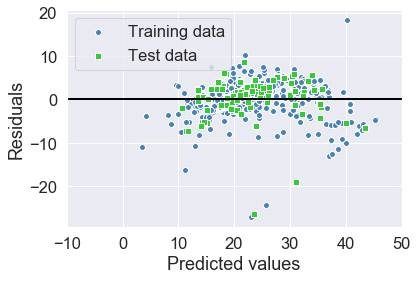

In [11]:
lasso=Lasso(alpha=0.0008685,normalize=True)
lasso.fit(X_train,y_train)
print("Coefficients:",lasso.coef_)
print('Intercept: %.3f' % lasso.intercept_)
y_pred=lasso.predict(X_test)
print("R^2: {}".format(lasso.score(X_test,y_test)))
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: {}".format(mse))
y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.show()

Best Alpha:0.06034096410657249


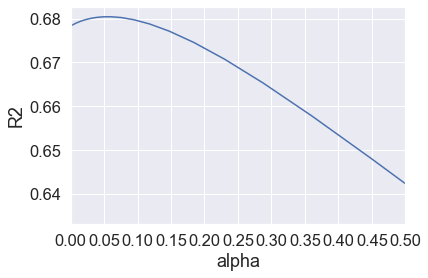

In [12]:
#RIDGE
from sklearn.linear_model import Ridge
alpha_space=np.logspace(-5,-0.25,50)
mse_value=[]
alpha_value=[]
R2_value=[]
for alpha in alpha_space:
    ridge=Ridge(alpha=alpha,normalize=True)
    ridge.fit(X_train,y_train)
    R2=ridge.score(X_test,y_test)
    alpha_value.append(alpha)
    R2_value.append(R2)
best=alpha_space[R2_value.index(max(R2_value))]
print("Best Alpha:{}".format(best))
plt.plot(alpha_value,R2_value)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.xlim(0,0.5)
plt.xticks(np.arange(0, 0.55, step=0.05))
plt.show()

Coefficients: [ 2.04654274e+00 -4.24420441e-01  7.75377631e-01 -1.69225464e-01
 -3.19519485e-01 -7.44835188e-01  1.63115332e-02 -7.19520371e-01
 -4.00533061e-01 -7.71974460e-01 -1.19022147e+00  1.08303634e+00
 -1.79519739e-01 -8.36058088e-02  2.50601732e-02  1.94904274e-03
  1.93038065e+00 -8.94269358e+00  5.26771903e+00 -1.93295149e-02
 -1.15810509e+00  1.45606356e-01 -6.22557036e-03 -8.05830702e-01
  1.33896084e-02 -4.53007249e-01]
Intercept: 17.432
R^2: 0.6804032958032582
Mean Squared Error: 22.173623196567412


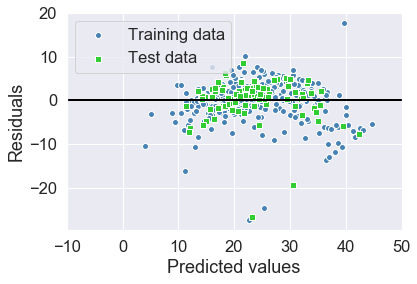

In [13]:
ridge=Ridge(alpha=0.060341,normalize=True)
ridge.fit(X_train,y_train)
print("Coefficients:",ridge.coef_)
print('Intercept: %.3f' % ridge.intercept_)
y_pred=ridge.predict(X_test)
print("R^2: {}".format(ridge.score(X_test,y_test)))
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: {}".format(mse))
y_train_pred=ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.show()

In [14]:
print("My name is Yulong Wang")
print("My NetID is yulongw2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation")

My name is Yulong Wang
My NetID is yulongw2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation
